In [1]:
# Studying the trade-off between exploration and exploitation
# The agent tries to learn the optimal policy in a maze
# The maze has two-way portals in it... See maze.py for attributions.

%matplotlib inline
import gym
import gym_maze
from maze import simulate, average_win_episode, new_maze, plot_episodes_against_parameter
import numpy as np

pygame 2.0.0.dev6 (SDL 2.0.10, python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# You can teach the agent to navigate the maze using different methods for exploration,
# Epsilon Greedy (EG), Decaying-EG (ED) or Upper Confidence Bounds (UCB)

# The usage for each parameter is documented in maze.py
params = {
    "winning_streak": 80,
    "policy": "EG",
    "epsilon": 0.2,
    "learning_rate": 1.0,
    "starting_value": 0.0,
    "display": False
}

winning_episode = simulate(maze=new_maze(), n_episodes=1000, **params)["winning_episode"] 
print(f"The maze was learnt in {winning_episode} episodes.")

The maze was learnt in 82 episodes.


100%|██████████| 3/3 [06:37<00:00, 132.60s/it]

Policy was learnt as quickly as 102.77911646586345.


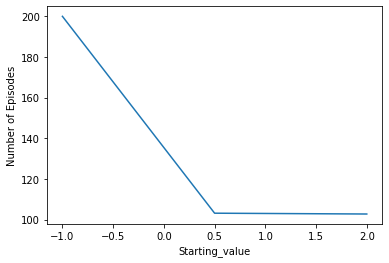

In [3]:
# Increase these values for better plots!
n_mazes = 500
n_levels = 10

# *--- EPSILON-GREEDY (EG) ---*
# Best initialization value for Epsilon-Greedy
initial_values = np.linspace(-1.0, 2.0, int(n_levels/3.0))
plot_y = plot_episodes_against_parameter("starting_value", initial_values, 
                                               params, n_mazes=n_mazes)

# Check whether it's beneficial to use optimistic initialization. 
# Does that change if epsilon (exploration) is 0.0?

100%|██████████| 10/10 [1:01:37<00:00, 369.74s/it]

Policy was learnt as quickly as 95.804.


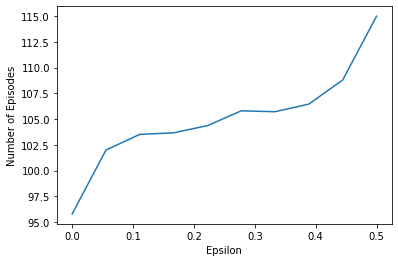

In [4]:
# Let's choose the best 'starting_value'
params["starting_value"] = initial_values[np.argmin(plot_y)]

# Best Epsilon for Epsilon-Greedy (with best initialization value)
params["learning_rate"] = 1.0
epsilons = np.linspace(0.0, 0.5, n_levels)
plot_y = plot_episodes_against_parameter("epsilon", epsilons, 
                                               params, n_mazes=n_mazes)

100%|██████████| 10/10 [24:18<00:00, 145.87s/it]

Policy was learnt as quickly as 82.0.


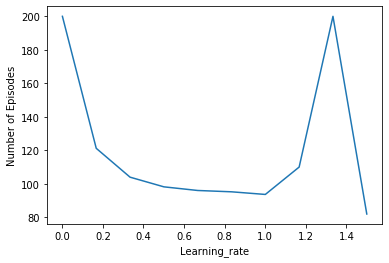

In [5]:
# Let's choose the best 'epsilon'
params["epsilon"] = epsilons[np.argmin(plot_y)]
# NOTE : Due to the initialization, it becomes preferable not to explore randomly.

# Best Learning-Rate for Epsilon-Greedy
learning_rates = np.linspace(0.001, 1.5, n_levels)
plot_y = plot_episodes_against_parameter("learning_rate", learning_rates, 
                                               params, n_mazes=n_mazes)

 90%|█████████ | 9/10 [03:01<00:19, 19.88s/it]/Users/shiraz/repos/reinforcement-learning/code/maze.py:101: RuntimeWarning: overflow encountered in double_scalars
  q_table[state + (action,)] += learning_rate * loss
/Users/shiraz/repos/reinforcement-learning/code/maze.py:100: RuntimeWarning: invalid value encountered in double_scalars
  loss = reward + discount_factor * q_max - q_table[state + (action,)]
/Users/shiraz/repos/reinforcement-learning/code/maze.py:101: RuntimeWarning: invalid value encountered in double_scalars
  q_table[state + (action,)] += learning_rate * loss
/Users/shiraz/.pyenv/versions/vgym/lib/python3.8/site-packages/numpy-1.18.0-py3.8-macosx-10.9-x86_64.egg/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/shiraz/.pyenv/versions/vgym/lib/python3.8/site-packages/numpy-1.18.0-py3.8-macosx-10.9-x86_64.egg/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret

Policy was learnt as quickly as 162.2.


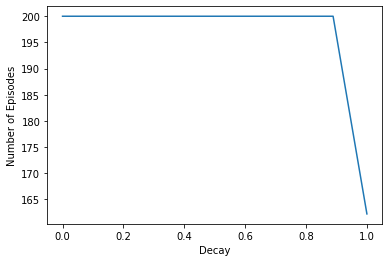

In [6]:
# *--- DECAYING EPSILON-GREEDY (ED) ---*
params["policy"] = "ED"
params["epsilon"] = 0.5
params["learning_rate"] = 1.3
params["starting_value"] = 0.3

n_mazes_small = int(n_mazes/5)
# Best decay-factor and learning rate (3-step optimization)
# First optimize decay-factor
decay_factors = np.linspace(0.0, 1.0, n_levels)
plot_y = plot_episodes_against_parameter("decay", decay_factors, params, n_mazes=n_mazes_small, view_plot=False)
params["decay"] = decay_factors[np.argmin(plot_y)]

# Then the learning rate
learning_rates = np.linspace(0.1, 1.5, n_levels)
plot_y = plot_episodes_against_parameter("learning_rate", learning_rates, params, n_mazes=n_mazes_small, view_plot=False)
params["learning_rate"] = learning_rates[np.argmin(plot_y)]

# Then the epsilon
epsilons = np.linspace(0.1, 1.1, n_levels)
plot_y = plot_episodes_against_parameter("learning_rate", learning_rates, params, n_mazes=n_mazes_small, view_plot=False)
params["learning_rate"] = learning_rates[np.argmin(plot_y)]

# Then the decay factor
decay_factors = np.linspace(0.0, 1.0, n_levels)
plot_y = plot_episodes_against_parameter("decay", decay_factors, params, n_mazes=n_mazes)

100%|██████████| 10/10 [34:38<00:00, 207.86s/it]

Policy was learnt as quickly as 95.28657314629258.


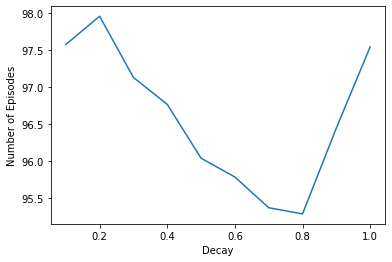

In [7]:
# NOTE : Unfortunately this is a trivial problem 
# where Learning Rate of 1.0 and Epsilon of 0.0 works just fine!

# *--- UPPER CONFIDENCE BOUNDS (UCB) ---*
params["policy"] = "UCB"
params["epsilon"] = 0.1
params["learning_rate"] = 0.5
params["starting_value"] = 0.0

# Best decay-factor (UCB values decay everytime a state-action is visited)
decay_factors = np.linspace(0.1, 1.0, n_levels)
plot_y = plot_episodes_against_parameter("decay", decay_factors, 
                                               params, n_mazes=n_mazes)


In [8]:
# NOTE : The UCB method, in this case, works pretty 
# much the same as the optimistic initialization. 
# They both encourage systematic exploration of unexplored state-action pairs. 